### 1. Import data and revelant packages 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [2]:
combined = pd.read_csv('/Users/admin/Desktop/Y3S2/BT4222/combined.csv')
combined = combined.drop(combined.columns[0], axis=1)
combined.head()

,district,street,propertyType,remaining_lease,price,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_area_sqm,floor_range,sentiment
0,5,ZEHNDER ROAD,Semi-detached,999.00,5500000.0,27,6,8,0,-1.0,1.282130,103.786879,524.3,~-,0.380502
1,5,ZEHNDER ROAD,Semi-detached,999.00,5000000.0,27,6,8,0,-1.0,1.282130,103.786879,308.0,~-,0.123495
2,5,ZEHNDER ROAD,Semi-detached,999.00,4750000.0,27,6,8,0,-1.0,1.282130,103.786879,314.0,~-,0.123495
3,5,NEO PEE TECK LANE,Terrace,999.00,2630000.0,27,6,8,2,-1.0,1.292047,103.768591,159.3,~-,0.380502
4,4,COVE DRIVE,Condominium,85.25,3180000.0,11,3,2,0,-1.0,1.244208,103.827487,194.0,~01-05,0.173732


In [3]:
combined['floor_range'] = combined['floor_range'].str.replace('~', '')
combined.head()

,district,street,propertyType,remaining_lease,price,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_area_sqm,floor_range,sentiment
0,5,ZEHNDER ROAD,Semi-detached,999.00,5500000.0,27,6,8,0,-1.0,1.282130,103.786879,524.3,-,0.380502
1,5,ZEHNDER ROAD,Semi-detached,999.00,5000000.0,27,6,8,0,-1.0,1.282130,103.786879,308.0,-,0.123495
2,5,ZEHNDER ROAD,Semi-detached,999.00,4750000.0,27,6,8,0,-1.0,1.282130,103.786879,314.0,-,0.123495
3,5,NEO PEE TECK LANE,Terrace,999.00,2630000.0,27,6,8,2,-1.0,1.292047,103.768591,159.3,-,0.380502
4,4,COVE DRIVE,Condominium,85.25,3180000.0,11,3,2,0,-1.0,1.244208,103.827487,194.0,01-05,0.173732


In [4]:
street_mapping = pickle.load(open('/Users/admin/Downloads/street_mapping.pickle', 'rb'))
floor_mapping = pickle.load(open('/Users/admin/Downloads/floor_mapping.pickle', 'rb'))
property_mapping = pickle.load(open('/Users/admin/Downloads/property_mapping.pickle', 'rb'))

combined['street'] = combined['street'].str.upper()
combined['street'] = combined['street'].map(street_mapping)
combined['propertyType'] = combined['propertyType'].map(property_mapping)
combined['floor_range'] = combined['floor_range'].map(floor_mapping)

In [5]:
combined.dtypes

district              int64
street                int64
propertyType          int64
remaining_lease     float64
price               float64
school                int64
hawkercentre          int64
supermarkets          int64
Bus Stops Nearby      int64
crime_number        float64
latitude            float64
longitude           float64
floor_area_sqm      float64
floor_range           int64
sentiment           float64
dtype: object

In [6]:
X_train, X_test, y_train, y_test = train_test_split(combined.drop('price', axis=1),
                                                    combined['price'], 
                                                    test_size=0.2,
                                                    random_state=1)

### 2. Linear Regression

In [7]:
print(X_train.shape)
print(X_test.shape)

(106952, 14)
(26738, 14)


In [8]:
X_train.isnull().any()

district            False
street              False
propertyType        False
remaining_lease     False
school              False
hawkercentre        False
supermarkets        False
Bus Stops Nearby    False
crime_number        False
latitude            False
longitude           False
floor_area_sqm      False
floor_range         False
sentiment           False
dtype: bool

In [9]:
# Creates a LinearRegression object (Ordinary least squares Linear Regression)
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

### 2.1 Calculate Metrics for Base Model

In [10]:
# Compute MSE
def mse(y_predicted, y_true):
    return np.mean(np.square(y_predicted - y_true))

mse_training = mse(lm.predict(X_train), y_train)
mse_testing = mse(lm.predict(X_test), y_test)

print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 624672492940.5381, testing mse: 477527166430.61884
training rmse: 790362.254248353, testing rmse: 691033.404713997


In [11]:
# Compute R2 and adjusted R2
print("training R2: {}, testing R2: {}".format(lm.score(X_train, y_train), lm.score(X_test, y_test)))
print("training adjusted R2: {}, testing adjusted R2: {}".format(
    1 - (1-lm.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1), 
    1 - (1-lm.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)))


training R2: 0.7768115930026295, testing R2: 0.7731323492867104
training adjusted R2: 0.7767823735771924, testing adjusted R2: 0.7730134948500833


In [12]:
# Calculate MAE
print("training MAE: {}, testing MAE: {}".format(
    mean_absolute_error(y_train, lm.predict(X_train)),
    mean_absolute_error(y_test, lm.predict(X_test)),    
))

training MAE: 395530.77502868744, testing MAE: 394606.6773487653


In [13]:
# Calculate sMAPE
def smape(y_true, y_pred):
    return 1/len(y_true) * np.sum(2 * np.abs(y_pred-y_true) / (np.abs(y_true) + np.abs(y_pred))*100)

smape_training = smape(y_train, lm.predict(X_train))
smape_testing = smape(y_test, lm.predict(X_test))
print("training smape: {}, testing smape: {}".format(smape_training, smape_testing))

training smape: 57.46450926688355, testing smape: 57.41153530904644


In [14]:
# Calulate MAPE
def MAPE(y_actual,y_predicted):
    mape = np.mean(np.abs((y_actual - y_predicted)/y_actual))*100
    return mape
mape_training = MAPE(y_train, lm.predict(X_train))
mape_testing = MAPE(y_test, lm.predict(X_test))
print("training mape: {}, testing mape: {}".format(mape_training, mape_testing))

training mape: 57.6210080826962, testing mape: 57.68815230685214


### 2.2 Residual Plot for Base Model

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Residual plot')

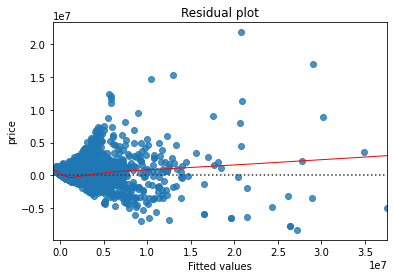

In [15]:
# Residual plot
sns.residplot(lm.predict(X_test).reshape(-1),y_test,lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')

67818    -157573.178330
30034     806034.661379
121580    134023.234860
118033    149138.991924
12315    -575730.847760
              ...      
104122     52163.700044
99154     314225.936246
5262      277659.076252
115977   -231272.662729
63597     -10198.080179
Name: price, Length: 26738, dtype: float64


Text(0.5, 1.0, 'Normal Q-Q Plot')

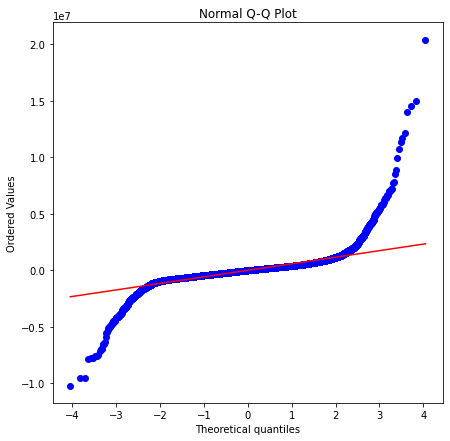

In [16]:
# QQ Plot
residuals = y_test - lm.predict(X_test).reshape(-1)
print(residuals)
plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Fitted value')

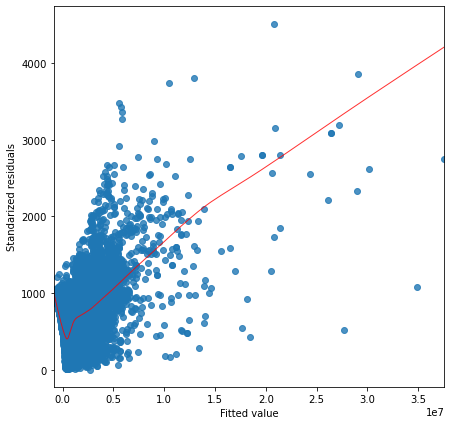

In [17]:
# Scale Location Plot
norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))

plt.figure(figsize=(7,7))
sns.regplot(lm.predict(X_test).reshape(-1), norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")

### 2.3 Feature Cross

In [18]:
_, longitude_boundaries = np.histogram(X_train['longitude'])
_, latitude_boundaries = np.histogram(X_train['latitude'])

def assign_bucket(x, ranges):
    if x <= ranges[0]:
        return 0
    
    for i in range(1, len(ranges) - 1):
        if x <= ranges[i]:
            return i - 1
    return len(ranges) - 2

X_train['lgt_discrete'] = X_train['longitude'].apply(lambda x: assign_bucket(x, longitude_boundaries))
X_train['lat_discrete'] = X_train['latitude'].apply(lambda x: assign_bucket(x, latitude_boundaries))
X_test['lgt_discrete'] = X_test['longitude'].apply(lambda x: assign_bucket(x, longitude_boundaries))
X_test['lat_discrete'] = X_test['latitude'].apply(lambda x: assign_bucket(x, latitude_boundaries))

In [19]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories='auto')
features_lat_lgn_train = enc.fit_transform(X_train[['lgt_discrete', 'lat_discrete']]) # fit and transform TRAIN
features_lat_lgn_test = enc.transform(X_test[['lgt_discrete', 'lat_discrete']]) # transform only TEST

### 2.4 Error Metrics and Coefficients

In [20]:
features_to_drop = ['longitude', 'latitude', 'lgt_discrete', 'lat_discrete']
OHE_train = np.hstack((X_train.drop(features_to_drop, axis=1).values, features_lat_lgn_train.toarray()))
OHE_test = np.hstack((X_test.drop(features_to_drop, axis=1).values, features_lat_lgn_test.toarray()))

lm.fit(OHE_train, y_train)

mse_training = mse(lm.predict(OHE_train), y_train)
mse_testing = mse(lm.predict(OHE_test), y_test)

print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 586273664105.8457, testing mse: 441564091503.3671
training rmse: 765685.0946086424, testing rmse: 664502.8905154342


In [21]:
# Compute R2 and adjusted R2
print("training R2: {}, testing R2: {}".format(lm.score(OHE_train, y_train), lm.score(OHE_test, y_test)))
print("training adjusted R2: {}, testing adjusted R2: {}".format(
    1 - (1-lm.score(OHE_train, y_train))*(len(y_train)-1)/(len(y_train)-OHE_train.shape[1]-1), 
    1 - (1-lm.score(OHE_test, y_test))*(len(y_test)-1)/(len(y_test)-OHE_test.shape[1]-1)))


training R2: 0.7905310596592067, testing R2: 0.7902179915176132
training adjusted R2: 0.7904683672837551, testing adjusted R2: 0.7899666144619518


In [22]:
# Calculate MAE
print("training MAE: {}, testing MAE: {}".format(
    mean_absolute_error(y_train, lm.predict(OHE_train)),
    mean_absolute_error(y_test, lm.predict(OHE_test)),    
))

training MAE: 380130.635725368, testing MAE: 378100.67777910206


In [23]:
# Calculate sMAPE
smape_training = smape(y_train, lm.predict(OHE_train))
smape_testing = smape(y_test, lm.predict(OHE_test))
print("training smape: {}, testing smape: {}".format(smape_training, smape_testing))

training smape: 55.83541952235788, testing smape: 55.776366078256125


In [24]:
# Calulate MAPE
mape_training = MAPE(y_train, lm.predict(OHE_train))
mape_testing = MAPE(y_test, lm.predict(OHE_test))
print("training mape: {}, testing mape: {}".format(mape_training, mape_testing))

training mape: 55.72938866033957, testing mape: 55.735835411288534


### 2.5 Residual Plots for Feature-Crossed Model

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Residual plot')

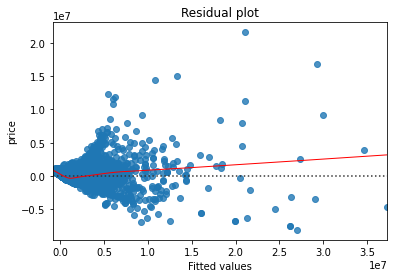

In [25]:
# Residual plot
sns.residplot(lm.predict(OHE_test).reshape(-1),y_test,lowess=True,
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')

67818    -188895.634845
30034     777496.915921
121580    -59978.225117
118033   -137980.443973
12315    -719625.448109
              ...      
104122   -559368.272744
99154     344290.756950
5262     -130115.030786
115977   -495423.581176
63597    -223469.058392
Name: price, Length: 26738, dtype: float64


Text(0.5, 1.0, 'Normal Q-Q Plot')

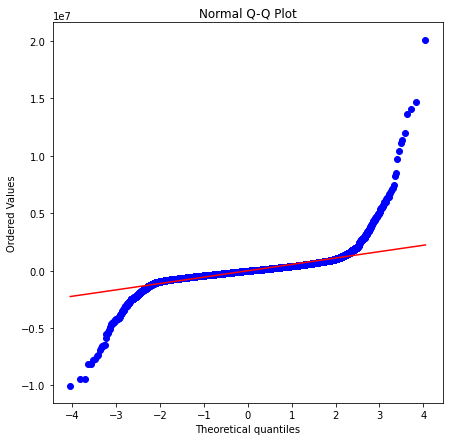

In [26]:
# QQ Plot
residuals = y_test - lm.predict(OHE_test).reshape(-1)
print(residuals)
plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Fitted value')

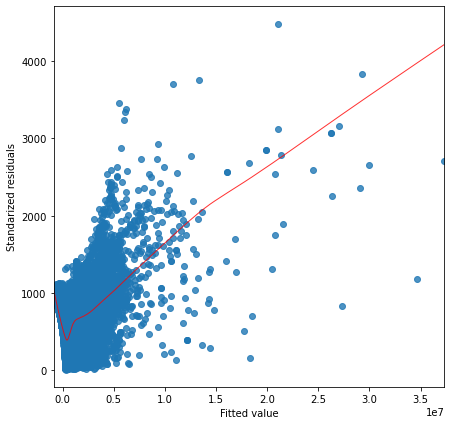

In [27]:
# Scale Location Plot
norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))

plt.figure(figsize=(7,7))
sns.regplot(lm.predict(OHE_test).reshape(-1).reshape(-1), norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")

In [28]:
pd.DataFrame([x for x in zip(list(X_train.drop(features_to_drop, axis=1).columns) \
              + [str(x) for x in range(31)], lm.coef_)], columns=['features', 'coefficients'])

,features,coefficients
0,district,-42537.131328
1,street,-109.170143
2,propertyType,14008.770490
3,remaining_lease,0.739335
4,school,7371.802181
5,hawkercentre,-63259.579283
6,supermarkets,376.729643
7,Bus Stops Nearby,35524.424433
8,crime_number,-922.406997
9,floor_area_sqm,14557.275873


### 3. Polynomial Regression and Error Metrics

In [29]:
pre_process = PolynomialFeatures(degree=2)

# Transform with OHE datasets
X_poly = pre_process.fit_transform(OHE_train)
X_test_poly = pre_process.transform(OHE_test)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

mse_training = mse(poly_model.predict(X_poly), y_train)
mse_testing = mse(poly_model.predict(X_test_poly), y_test)

print("training mse: {}, testing mse: {}".format(mse_training, mse_testing))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(mse_training), np.sqrt(mse_testing)))

training mse: 274474097109.36914, testing mse: 223206431273.85974
training rmse: 523902.7553939463, testing rmse: 472447.2788299873


In [30]:
# Compute R2 and adjusted R2
print("training R2: {}, testing R2: {}".format(poly_model.score(X_poly, y_train), 
                                               poly_model.score(X_test_poly, y_test)))
print("training adjusted R2: {}, testing adjusted R2: {}".format(
    1 - (1-poly_model.score(X_poly, y_train))*(len(y_train)-1)/(len(y_train)-X_poly.shape[1]-1), 
    1 - (1-poly_model.score(X_test_poly, y_test))*(len(y_test)-1)/(len(y_test)-X_test_poly.shape[1]-1)))


training R2: 0.9019335136600727, testing R2: 0.8939571981512475
training adjusted R2: 0.9014164039802466, testing adjusted R2: 0.8916845051562463


In [31]:
# Calculate MAE
print("training MAE: {}, testing MAE: {}".format(
    mean_absolute_error(y_train, poly_model.predict(X_poly)),
    mean_absolute_error(y_test, poly_model.predict(X_test_poly)),    
))

training MAE: 212491.1961596375, testing MAE: 216263.41046476839


In [32]:
# Calculate sMAPE
smape_training = smape(y_train, poly_model.predict(X_poly))
smape_testing = smape(y_test, poly_model.predict(X_test_poly))
print("training smape: {}, testing smape: {}".format(smape_training, smape_testing))

training smape: 24.67552370243796, testing smape: 24.99882964490997


In [33]:
# Calculate MAPE
mape_training = MAPE(y_train, poly_model.predict(X_poly))
mape_testing = MAPE(y_test, poly_model.predict(X_test_poly))
print("training mape: {}, testing mape: {}".format(mape_training, mape_testing))

training mape: 24.553339503803453, testing mape: 25.044732506143223


In [34]:
pd.DataFrame([x for x in zip(list(X_train.drop(features_to_drop, axis=1).columns) \
              + [str(x) for x in range(31)], poly_model.coef_)], columns=['features', 'coefficients'])

,features,coefficients
0,district,-6.056313e-01
1,street,2.005493e+05
2,propertyType,1.161388e+02
3,remaining_lease,1.299674e+05
4,school,7.820594e+03
5,hawkercentre,-1.282070e+04
6,supermarkets,-4.911043e+05
7,Bus Stops Nearby,-4.756957e+05
8,crime_number,5.510303e+04
9,floor_area_sqm,9.742824e+03
